# The purpose of this notebook is to write code which will give us a sense of how a stock will move due to earnings based on historical data and performance

## We'll start with simple EDA and rule-based type stuff, and then potentially move onto ML models

### First started around 4/19/20

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

#import sys
#sys.path.append('.')

#import yfinance as yf
#import os
#os.chdir('C:\\Users\\jfm62\\Desktop\\Code\\yfinance')

import yfinance.yfinance as yf

In [2]:
dpz = yf.Ticker('DPZ') # get Domino's Pizza
df = dpz.history(period='max') # get as much data as possible
df = df.drop(columns=['Dividends', 'Stock Splits']) # we don't care about dividends or stock splits for this
df.tail()

JSONDecodeError: Expecting value: line 1 column 1 (char 0)

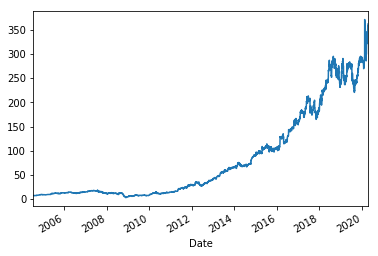

In [3]:
df.Close.plot()
plt.show()

## Earnings:

In [4]:
# load earnings data
earnings = pd.read_csv('dpz_earnings.csv')
earnings.head()

,ticker,company,earnings_date,eps_estimate,reported_eps,surprise_percent
0,DPZ,Domino's Pizza Inc,Apr 23 2020 4,2.32,NaN,NaN
1,DPZ,Domino's Pizza Inc,Feb 20 2020 12,2.98,3.13,5.03
2,DPZ,Domino's Pizza Inc,Oct 08 2019 11,2.07,2.05,-0.97
3,DPZ,Domino's Pizza Inc,Jul 16 2019 11,2.02,2.19,8.42
4,DPZ,Domino's Pizza Inc,Apr 24 2019 11,2.09,2.20,5.26


In [5]:
# convert earnings_date to datetime object
earnings.earnings_date = earnings.earnings_date.apply(lambda x: datetime.strptime(x, '%b %d %Y %H'))
earnings.earnings_date = earnings.earnings_date.apply(lambda x: pd.to_datetime(x).floor('D'))
earnings.head()

,ticker,company,earnings_date,eps_estimate,reported_eps,surprise_percent
0,DPZ,Domino's Pizza Inc,2020-04-23,2.32,NaN,NaN
1,DPZ,Domino's Pizza Inc,2020-02-20,2.98,3.13,5.03
2,DPZ,Domino's Pizza Inc,2019-10-08,2.07,2.05,-0.97
3,DPZ,Domino's Pizza Inc,2019-07-16,2.02,2.19,8.42
4,DPZ,Domino's Pizza Inc,2019-04-24,2.09,2.20,5.26


In [6]:
earnings.earnings_date.min(), earnings.earnings_date.max()

(Timestamp('2017-02-28 00:00:00'), Timestamp('2020-04-23 00:00:00'))

In [7]:
earnings = earnings.dropna(how='any')
earnings = earnings.reset_index(drop=True)
earnings

,ticker,company,earnings_date,eps_estimate,reported_eps,surprise_percent
0,DPZ,Domino's Pizza Inc,2020-02-20,2.98,3.13,5.03
1,DPZ,Domino's Pizza Inc,2019-10-08,2.07,2.05,-0.97
2,DPZ,Domino's Pizza Inc,2019-07-16,2.02,2.19,8.42
3,DPZ,Domino's Pizza Inc,2019-04-24,2.09,2.20,5.26
4,DPZ,Domino's Pizza Inc,2019-02-21,2.69,2.62,-2.60
5,DPZ,Domino's Pizza Inc,2018-10-16,1.75,1.95,11.43
6,DPZ,Domino's Pizza Inc,2018-07-19,1.75,1.84,5.14
7,DPZ,Domino's Pizza Inc,2018-04-26,1.77,2.00,12.99
8,DPZ,Domino's Pizza Inc,2018-02-20,1.95,2.09,7.18
9,DPZ,Domino's Pizza Inc,2017-10-12,1.23,1.27,3.25


In [8]:
earnings['beat'] = earnings.apply(lambda x: 1 if x['reported_eps'] > x['eps_estimate'] else 0, axis=1)
earnings

,ticker,company,earnings_date,eps_estimate,reported_eps,surprise_percent,beat
0,DPZ,Domino's Pizza Inc,2020-02-20,2.98,3.13,5.03,1
1,DPZ,Domino's Pizza Inc,2019-10-08,2.07,2.05,-0.97,0
2,DPZ,Domino's Pizza Inc,2019-07-16,2.02,2.19,8.42,1
3,DPZ,Domino's Pizza Inc,2019-04-24,2.09,2.20,5.26,1
4,DPZ,Domino's Pizza Inc,2019-02-21,2.69,2.62,-2.60,0
5,DPZ,Domino's Pizza Inc,2018-10-16,1.75,1.95,11.43,1
6,DPZ,Domino's Pizza Inc,2018-07-19,1.75,1.84,5.14,1
7,DPZ,Domino's Pizza Inc,2018-04-26,1.77,2.00,12.99,1
8,DPZ,Domino's Pizza Inc,2018-02-20,1.95,2.09,7.18,1
9,DPZ,Domino's Pizza Inc,2017-10-12,1.23,1.27,3.25,1


In [9]:
percent_beat = np.sum(earnings.beat)/len(earnings)*100
percent_beat

84.61538461538461

###  We see that over the last ~3 years, or 13 Quarters, Domino's has beat earnings estimates 84.62% of times

# What kind of suprise do we tend to see on average? What if we split by beat vs not-beat?

# What kind of move do we see following earnings announcement?

In [10]:
dates = earnings.earnings_date.values
#dates = [date for date in dates]
dates

array(['2020-02-20T00:00:00.000000000', '2019-10-08T00:00:00.000000000',
       '2019-07-16T00:00:00.000000000', '2019-04-24T00:00:00.000000000',
       '2019-02-21T00:00:00.000000000', '2018-10-16T00:00:00.000000000',
       '2018-07-19T00:00:00.000000000', '2018-04-26T00:00:00.000000000',
       '2018-02-20T00:00:00.000000000', '2017-10-12T00:00:00.000000000',
       '2017-07-25T00:00:00.000000000', '2017-04-27T00:00:00.000000000',
       '2017-02-28T00:00:00.000000000'], dtype='datetime64[ns]')

In [11]:
beats = earnings.beat.values

In [12]:
df = df[df.index.get_level_values('Date') >= dates.min() - pd.to_timedelta('30 days')]
df.head()

,Open,High,Low,Close,Volume
Date,,,,,
2017-01-30,166.00,168.80,165.86,168.72,655200
2017-01-31,168.49,169.84,167.34,169.31,822000
2017-02-01,169.57,170.57,164.96,165.77,662200
2017-02-02,166.52,169.79,165.54,169.67,1154800
2017-02-03,169.98,171.99,169.09,170.62,749900


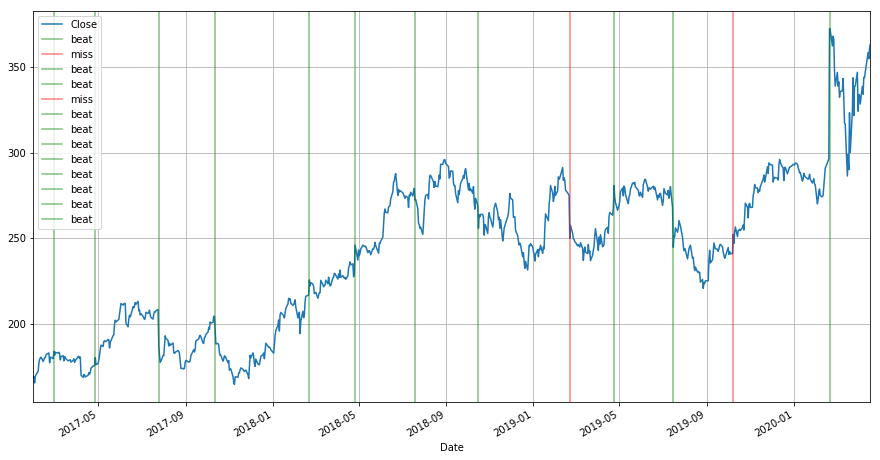

In [13]:
fig,ax = plt.subplots(figsize=(15,8))
df.Close.plot()
for date,beat in zip(dates,beats):
    if beat == 1:
        plt.axvline(x=date, c='g', alpha=0.5, label='beat')
    else:
        plt.axvline(x=date, c='r', alpha=0.5, label='miss')
plt.legend()
plt.grid()
plt.show()

In [14]:
dates = [date for date in dates]

In [15]:
df = df.reset_index()
df['earnings'] = df.Date.apply(lambda x: 1 if x in dates else 0)
df = df.set_index('Date')
df.head()

,Open,High,Low,Close,Volume,earnings
Date,,,,,,
2017-01-30,166.00,168.80,165.86,168.72,655200,0
2017-01-31,168.49,169.84,167.34,169.31,822000,0
2017-02-01,169.57,170.57,164.96,165.77,662200,0
2017-02-02,166.52,169.79,165.54,169.67,1154800,0
2017-02-03,169.98,171.99,169.09,170.62,749900,0


In [16]:
df['day_gain'] = df.Close - df.Open
df.head()

,Open,High,Low,Close,Volume,earnings,day_gain
Date,,,,,,,
2017-01-30,166.00,168.80,165.86,168.72,655200,0,2.72
2017-01-31,168.49,169.84,167.34,169.31,822000,0,0.82
2017-02-01,169.57,170.57,164.96,165.77,662200,0,-3.80
2017-02-02,166.52,169.79,165.54,169.67,1154800,0,3.15
2017-02-03,169.98,171.99,169.09,170.62,749900,0,0.64


In [17]:
df['prev_close'] = df.Close.shift()
df.head()

,Open,High,Low,Close,Volume,earnings,day_gain,prev_close
Date,,,,,,,,
2017-01-30,166.00,168.80,165.86,168.72,655200,0,2.72,NaN
2017-01-31,168.49,169.84,167.34,169.31,822000,0,0.82,168.72
2017-02-01,169.57,170.57,164.96,165.77,662200,0,-3.80,169.31
2017-02-02,166.52,169.79,165.54,169.67,1154800,0,3.15,165.77
2017-02-03,169.98,171.99,169.09,170.62,749900,0,0.64,169.67


In [18]:
df['prev_close_to_open'] = df.Open - df.prev_close
df['prev_close_to_close'] = df.Close - df.prev_close
df.head()

,Open,High,Low,Close,Volume,earnings,day_gain,prev_close,prev_close_to_open,prev_close_to_close
Date,,,,,,,,,,
2017-01-30,166.00,168.80,165.86,168.72,655200,0,2.72,NaN,NaN,NaN
2017-01-31,168.49,169.84,167.34,169.31,822000,0,0.82,168.72,-0.23,0.59
2017-02-01,169.57,170.57,164.96,165.77,662200,0,-3.80,169.31,0.26,-3.54
2017-02-02,166.52,169.79,165.54,169.67,1154800,0,3.15,165.77,0.75,3.90
2017-02-03,169.98,171.99,169.09,170.62,749900,0,0.64,169.67,0.31,0.95


In [19]:
df['open_pct_change'] = df.apply(lambda x: (x.prev_close_to_open/x.prev_close)*100, axis=1)
df['close_pct_change'] = df.apply(lambda x: (x.prev_close_to_close/x.prev_close)*100, axis=1)

In [46]:
res_df = df[df.earnings == 1]
res_df['beat']= beats[::-1]
res_df

C:\Users\jfm62\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Open,High,Low,Close,Volume,earnings,day_gain,prev_close,prev_close_to_open,prev_close_to_close,open_pct_change,close_pct_change,beat
Date,,,,,,,,,,,,,
2017-02-28,180.98,186.08,176.80,184.12,2158200,1,3.14,179.86,1.12,4.26,0.622707,2.368509,1
2017-04-27,181.94,183.64,178.70,180.43,2422000,1,-1.51,175.97,5.97,4.46,3.392624,2.534523,1
2017-07-25,201.75,201.75,187.18,187.52,4249500,1,-14.23,208.54,-6.79,-21.02,-3.255970,-10.079601,1
2017-10-12,195.35,200.64,192.18,196.41,4872900,1,1.06,204.43,-9.08,-8.02,-4.441618,-3.923103,1
2018-02-20,211.08,222.44,203.95,216.95,4770100,1,5.87,216.21,-5.13,0.74,-2.372693,0.342260,1
2018-04-26,245.03,250.38,241.54,246.07,1709100,1,1.04,229.30,15.73,16.77,6.860009,7.313563,1
2018-07-19,270.56,280.17,268.50,272.28,1970200,1,1.72,279.10,-8.54,-6.82,-3.059835,-2.443569,1
2018-10-16,261.03,263.84,253.54,255.93,2390800,1,-5.10,269.05,-8.02,-13.12,-2.980859,-4.876417,1
2019-02-21,258.33,259.23,247.00,249.96,3877500,1,-8.37,275.13,-16.80,-25.17,-6.106204,-9.148403,0


In [48]:
res_df.open_pct_change.median(), res_df.open_pct_change.mean()

(-2.9808585764727886, 0.46979524378823084)

In [49]:
res_df.close_pct_change.median(), res_df.close_pct_change.mean()

(0.3422598399703902, 0.6596229214149478)

In [58]:
res_df[-5:].open_pct_change.mean()

2.2685948732478103

In [50]:
temp = earnings[['earnings_date', 'surprise_percent']]
#temp

In [51]:
res_df = res_df.merge(temp, left_on='Date', right_on='earnings_date')
res_df = res_df.set_index(['earnings_date'])
res_df.index.name = 'Date'
res_df

,Open,High,Low,Close,Volume,earnings,day_gain,prev_close,prev_close_to_open,prev_close_to_close,open_pct_change,close_pct_change,beat,surprise_percent
Date,,,,,,,,,,,,,,
2017-02-28,180.98,186.08,176.80,184.12,2158200,1,3.14,179.86,1.12,4.26,0.622707,2.368509,1,2.78
2017-04-27,181.94,183.64,178.70,180.43,2422000,1,-1.51,175.97,5.97,4.46,3.392624,2.534523,1,8.62
2017-07-25,201.75,201.75,187.18,187.52,4249500,1,-14.23,208.54,-6.79,-21.02,-3.255970,-10.079601,1,7.32
2017-10-12,195.35,200.64,192.18,196.41,4872900,1,1.06,204.43,-9.08,-8.02,-4.441618,-3.923103,1,3.25
2018-02-20,211.08,222.44,203.95,216.95,4770100,1,5.87,216.21,-5.13,0.74,-2.372693,0.342260,1,7.18
2018-04-26,245.03,250.38,241.54,246.07,1709100,1,1.04,229.30,15.73,16.77,6.860009,7.313563,1,12.99
2018-07-19,270.56,280.17,268.50,272.28,1970200,1,1.72,279.10,-8.54,-6.82,-3.059835,-2.443569,1,5.14
2018-10-16,261.03,263.84,253.54,255.93,2390800,1,-5.10,269.05,-8.02,-13.12,-2.980859,-4.876417,1,11.43
2019-02-21,258.33,259.23,247.00,249.96,3877500,1,-8.37,275.13,-16.80,-25.17,-6.106204,-9.148403,0,-2.60


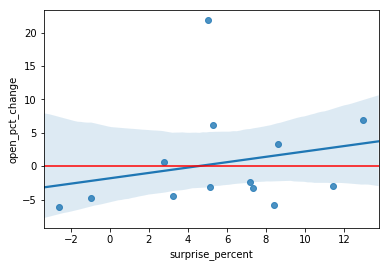

In [53]:
import seaborn as sns
sns.regplot(x='surprise_percent', y='open_pct_change', data=res_df)
plt.axhline(y=0, c='r')
plt.show()

# What is the typical run-up to earnings?